# Stack Overflow Developer Survey - 2017

Every year, Stack Overflow conducts a massive survey of people on the site, covering all sorts of information like programming languages, salary, code style and various other information



The analysis will follow the CRISP-DM steps:

1) Business Understanding 

2) Data Understanding (access and explore)

3) Data Preparation (cleaning)

4) Modeling (optional)

5) Evaluation

6) Deployment

# `1)` Business understanding

Looking at the dataset from the survey some questioned were triggered related to the salary of people who work in the programing field.

The data analysis will be directed towards answering three questions regarding the top 10 presented countries

1) In Which countries people earned more than the rest.

2) What is the relation between salary and eduction in these counries.

3) How to forecast the salary based on the survey data considering categrical data like country and eduction level?

# `2)` Load packages and the dataset

In [1]:
'''
install missingno package to visualise the missing values in the dataset
'''
!pip install missingno

In [2]:
# import the following packages 
import pandas as pd
import numpy as np
import seaborn as sns
import random

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

import missingno as msno

In [3]:
# read the data from Kaggle website

survey = pd.read_csv('survey_results_public.csv')


In [4]:
survey.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# `3)` Explore the dataset

### Size of dataframe

In [5]:
# get the total number of rows in the dataframe
n_rows = survey.shape[0]
n_columns = survey.shape[1]


print('number of rows is :', n_rows)
print('number of columns is: ', n_columns)

number of rows is : 51392
number of columns is:  154


### Describe the numerical values of the dataframe

In [6]:
#describe the dataset 
survey.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


The dataset has only 6 columns that has features that are numerical excluding the Respondant that counts the responses

### Column names

In [7]:
# get the name of columns 
list(survey.columns)

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation',
 'MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'CareerSatisfaction',
 'JobSatisfaction',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobT

### Datatypes

In [8]:
#get the datatypes of columns
survey.dtypes.to_frame().reset_index()

,index,0
0,Respondent,int64
1,Professional,object
2,ProgramHobby,object
3,Country,object
4,University,object
...,...,...
149,QuestionsInteresting,object
150,QuestionsConfusing,object
151,InterestedAnswers,object
152,Salary,float64


In [9]:
# get the name of the numerical columns of the dataset
survery_dtypes = (survey.dtypes=='float64').to_frame().reset_index()
survery_dtypes[(survery_dtypes[0]==True)]


,index,0
18,CareerSatisfaction,True
19,JobSatisfaction,True
47,HoursPerWeek,True
127,StackOverflowSatisfaction,True
152,Salary,True
153,ExpectedSalary,True


### Check duplicated data 

In [10]:
# get the number of duplicated data points in the dataset
survey.duplicated().sum()

0

The dataset does not have any dublicated entries

The data analysis will be directed towards answering three questions regarding the **top 10 presented countries**

1) In Which countries where people earned and worked more than the rest.

2) What is the relation between salary and eduction in these counries.

3) How to forecast the salary based on the survey data considering categrical data like country and eduction level?

# `4)` Explore the dataset with plots

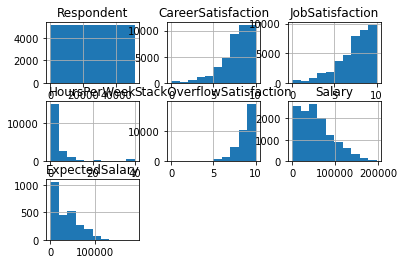

In [11]:
survey.hist();

Only 7 columns has numerical entries and the data in not notmally disctributed

<Figure size 432x432 with 0 Axes>

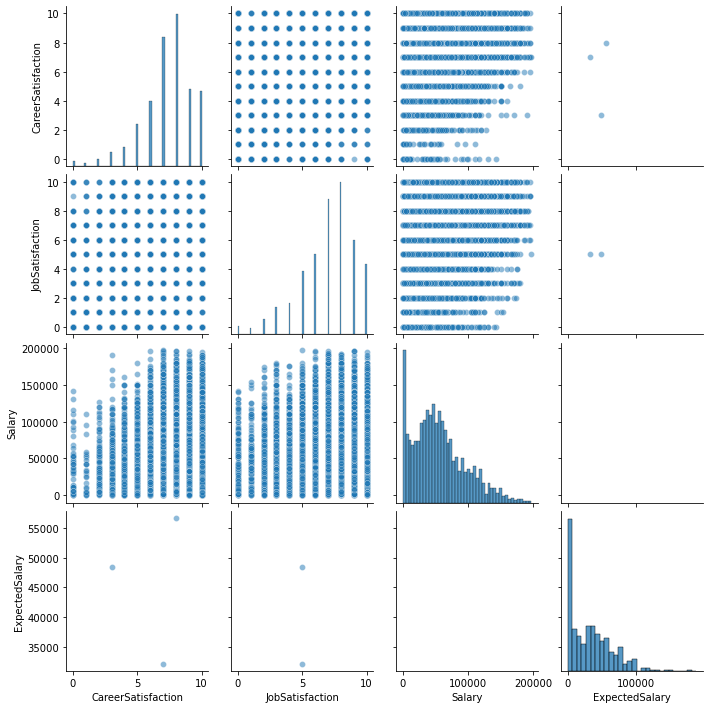

In [12]:
# plotting numerical data through pairplot
fig = plt.figure(figsize=(6,6)) 
g = sns.pairplot(survey[['CareerSatisfaction','JobSatisfaction', 'Salary', 'ExpectedSalary', 'Country']], plot_kws={'alpha': 0.5, 'edgecolor': 'white'})
fig = g.fig;

The plot holds a lot of information regarding the salary data. The majority of people participatred in the survey recieve low salaries and the expected salary data are showing a very low mood.

Lets see how this data is going to revial more infomration when broken down by country.

In [13]:
# get the name of countries in the survey data
country = survey.Country.unique()

In [14]:
#select the top 10 countries in terms of data representation
sel_country_df = survey.Country.value_counts().to_frame().head(10).reset_index()

In [15]:
sel_country_df.columns

Index(['index', 'Country'], dtype='object')

In [16]:
# get a list of names of the top 10 respresented countries
selected_country = list(sel_country_df['index'])
print(selected_country)

['United States', 'India', 'United Kingdom', 'Germany', 'Canada', 'France', 'Poland', 'Australia', 'Russian Federation', 'Spain']


In [17]:
# take a dataframe in which the data are related to the "selected_country"
# thus apply the hue and study the impact of country on the quantitative values in the dataset
df_selected_country = survey[survey['Country'].isin(selected_country)]
df_selected_country.head(10)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
9,10,Professional developer,"Yes, I program as a hobby",France,"Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,Computer science or software engineering,It's complicated,NaN,...,Disagree,Male,A doctoral degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN
10,11,Professional non-developer who sometimes write...,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,All or almost all the time (I'm full-time remote),100 to 499 employees,...,Strongly disagree,Female,"Some college/university study, no bachelor's d...",White or of European descent,Strongly disagree,Agree,Strongly disagree,Strongly agree,NaN,NaN
11,12,Professional developer,No,Canada,No,Employed full-time,Bachelor's degree,Computer science or software engineering,A few days each month,100 to 499 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,13,Used to be a professional developer,"Yes, I program as a hobby",United Kingdom,No,"Not employed, but looking for work",Bachelor's degree,Mathematics or statistics,NaN,NaN,...,Strongly disagree,Male,A bachelor's degree,White or of European descent,Disagree,Somewhat agree,Disagree,Agree,NaN,NaN


Construct pairplot of the **top 10 respresnted countries** in the dataset and see how the salary changes among these countries

<Figure size 432x432 with 0 Axes>

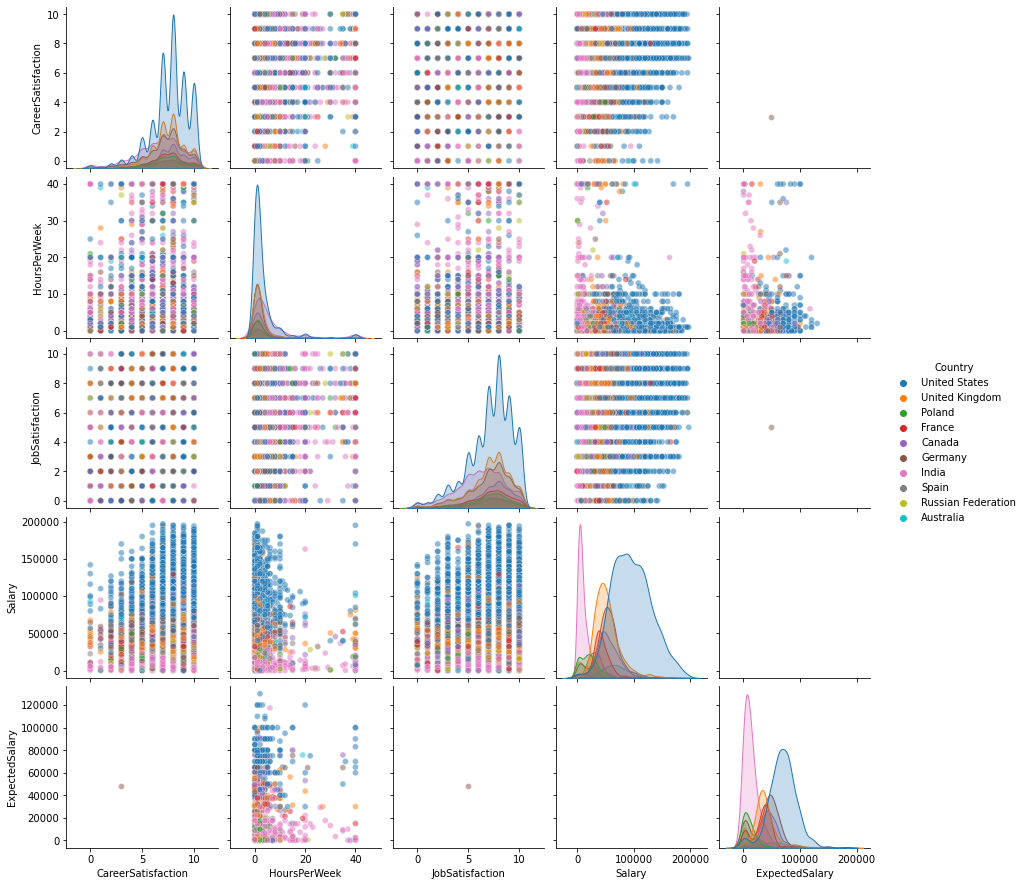

In [18]:
fig = plt.figure(figsize=(6,6)) 
g = sns.pairplot(df_selected_country[['CareerSatisfaction', 'HoursPerWeek','JobSatisfaction', 'Salary', 'ExpectedSalary', 'Country']], hue = 'Country', plot_kws={'alpha': 0.5, 'edgecolor': 'white'})
fig = g.fig;


**The answer of the first Question : In Which countries where people earned more than the rest and what is the impact of eduction on salary.**


In general, **salaries** in the US are higher than the rest of the other countries while India, Russia, and Spain are among the lowest. 

**Expected salary** data showed the same triend as actual salary data.

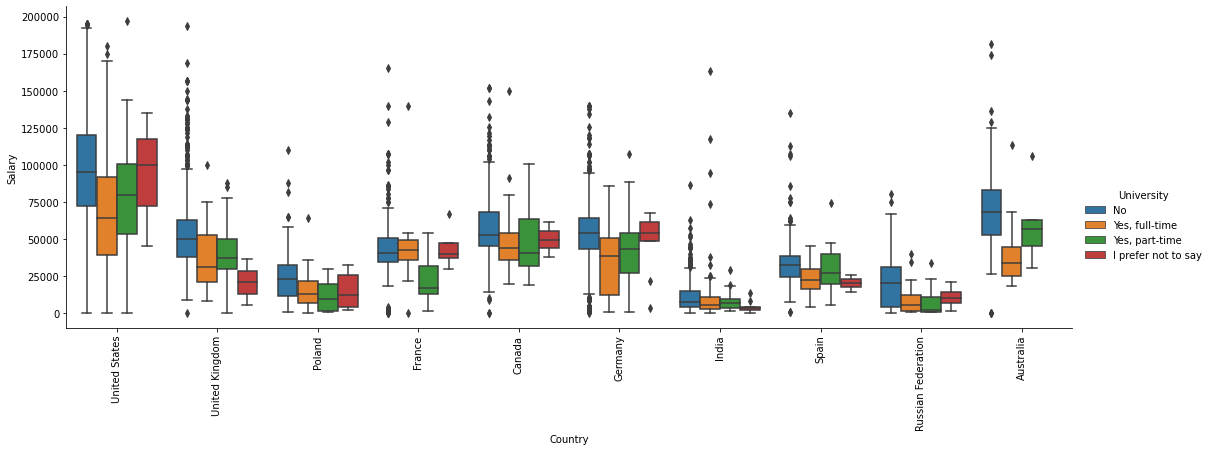

In [19]:
#Understand teh salary distribution for the most represented countries in the dataset consiering University education
sns.catplot(
    data=df_selected_country,
    x='Country',
    y='Salary',
    hue = 'University',
    kind='box',
    height=5, # make the plot 5 units high
    aspect=3); # height should be three times width

plt.xticks(rotation=90);


**The answer of the second Question : What is the relation between salary and eduction in these counries.**


The median of salaryies for people who did not attend university is higher than those who attended university in all regions in all countries except france.

There is a trend of trusting competencies and experience from doing actual projects in the field regardless of whether or not the person attended formal education.




#### Lets see how the data looks like for professional developers only 


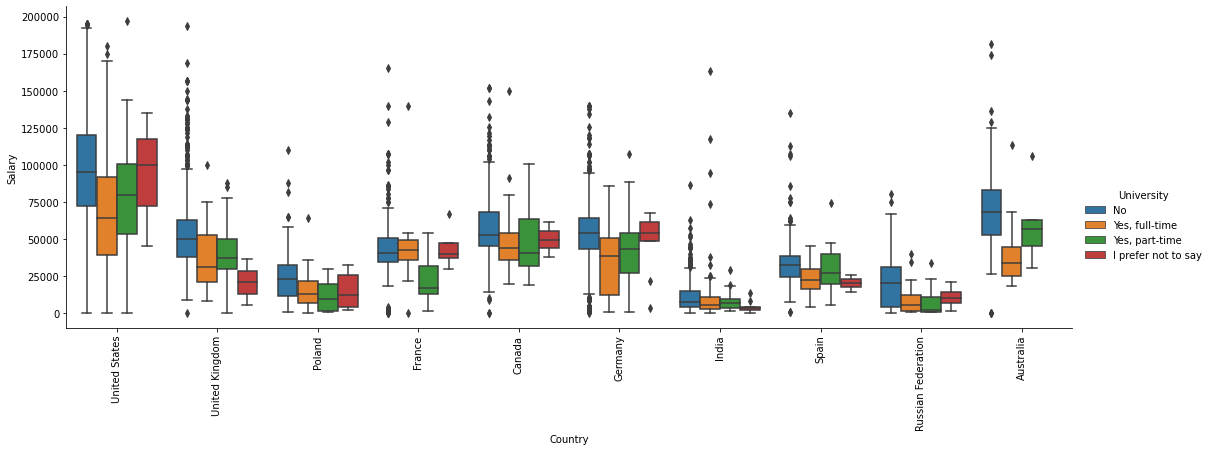

In [20]:
# create a dataframe to store the data of the professional developers 

df_selected_country_p = df_selected_country[df_selected_country['Professional']=='Professional developer']

# explore the impact of university education on the salary of professional developers
sns.catplot(
    data=df_selected_country,
    x='Country',
    y='Salary',
    hue = 'University',
    kind='box',
    height=5, # make the plot 5 units high
    aspect=3); # height should be three times width

plt.xticks(rotation=90);

The data still exhibit the same behavoir as teh data plotted earlier. Those who did not go for university education earn, on average, better than those who went to university education.

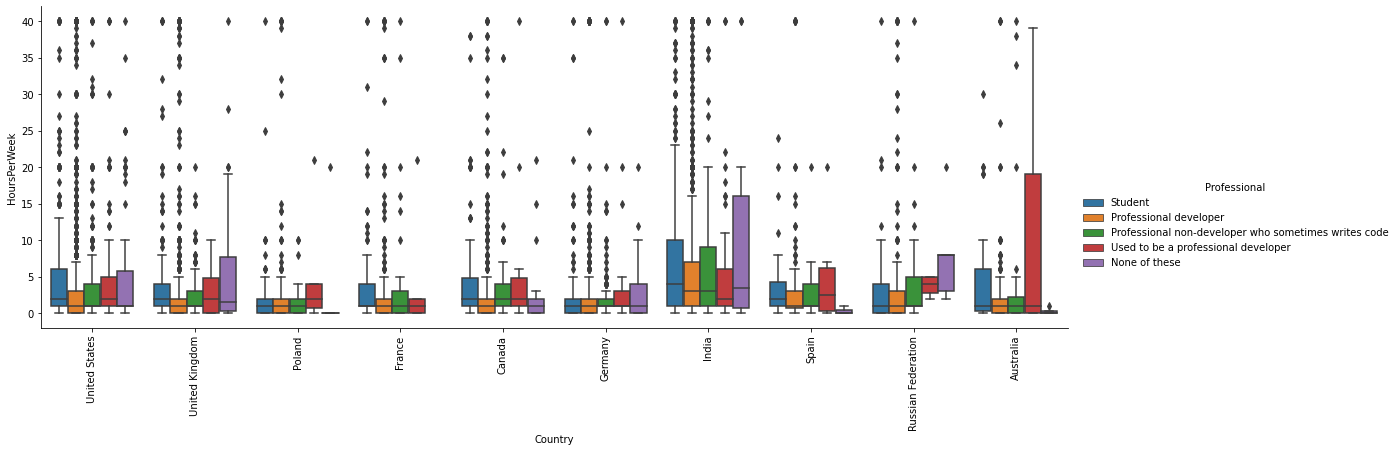

In [21]:
#Understand the workhours distribution for the most represented countries in the dataset consiering professionality level
sns.catplot(
    data=df_selected_country,
    x='Country',
    y='HoursPerWeek',
    hue = 'Professional',
    kind='box',
    height=5, # make the plot 5 units high
    aspect=3); # height should be three times width

plt.xticks(rotation=90);

The workhours data per week is very low except in India which is lighlightly higher than the rest

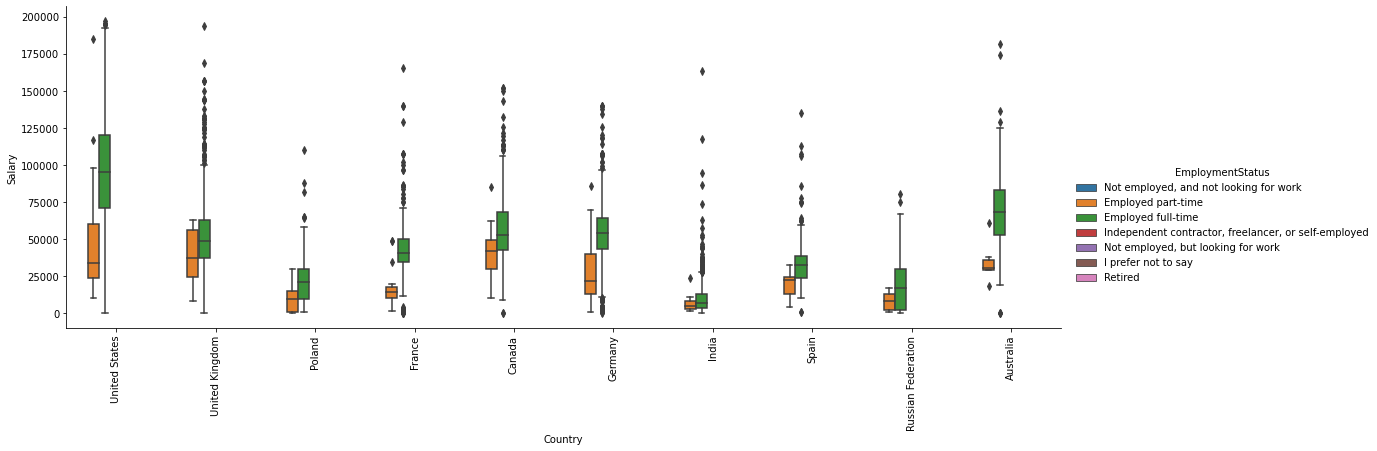

In [22]:
##Understand the salary distribution for the most represented countries in the dataset consiering employment status


sns.catplot(
    data=df_selected_country,
    x='Country',
    y='Salary',
    hue = 'EmploymentStatus',
    kind='box',
    height=5, # make the plot 5 units high
    aspect=3); # height should be three times width

plt.xticks(rotation=90);

Those who are employed full time earn more money that those who work part-time on average except for India where on average both earn the same

# `5)` Treat missing data 

<AxesSubplot:>

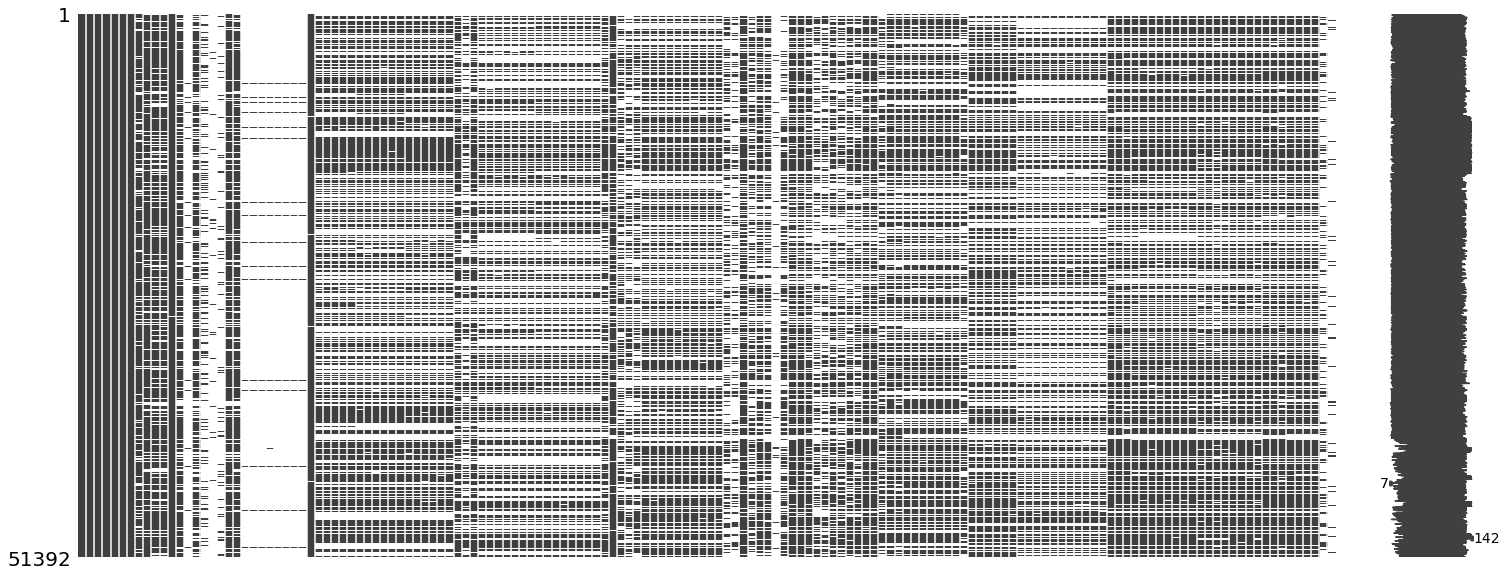

In [23]:
# investigate the missing data over the original dataset
msno.matrix(survey)

In [24]:
'''
as the investigation willbe run over the top represented countries considering workhours, education, professional level
dataframe suever_top is created with these parameters 

'''

survey_top = df_selected_country[['CareerSatisfaction', 'HoursPerWeek','JobSatisfaction',
                                  'Salary', 'Professional', 'Country', 'CompanySize', 'University']]

<AxesSubplot:>

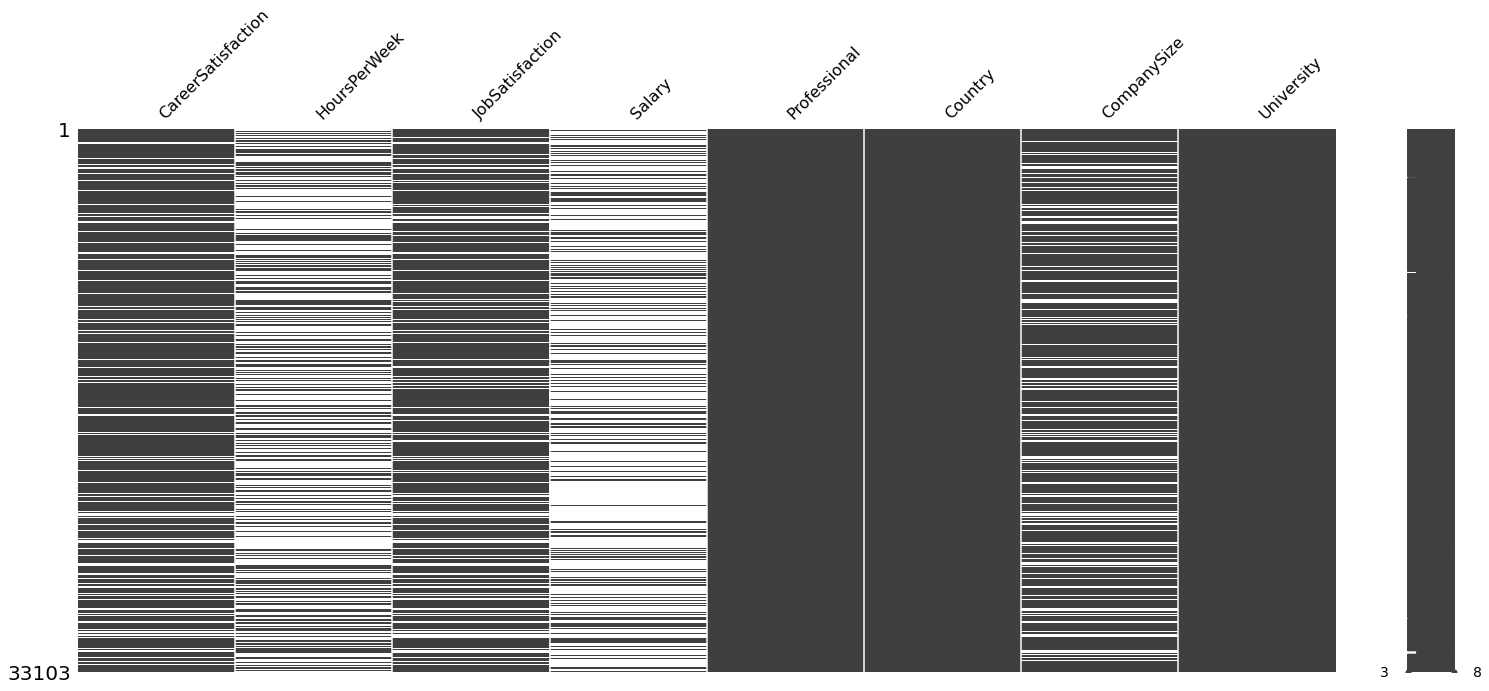

In [25]:
'''
explore the missing data in the suervey_top

'''

msno.matrix(survey_top)

In [26]:
#get the percentage of null values relative to the size of the dataframe (survey_top)
(survey_top.isnull().sum()/survey_top.shape[0])*100

CareerSatisfaction    16.206990
HoursPerWeek          60.384255
JobSatisfaction       20.563091
Salary                72.283479
Professional           0.000000
Country                0.000000
CompanySize           22.146029
University             0.000000
dtype: float64

The target from modelling will be to predict the **salary** which has many empty values. Data modelling will require that no missing values be in the dataset.

**The analysis will not go to predicting or assuming values for the missing salary values, instead it will be removed**.

In [27]:
# drop the missing values in the salary section 
survey_top_clean = survey_top.dropna(subset=['Salary'],axis = 0) # to drop na values for specific columns from a dataframe.

<AxesSubplot:>

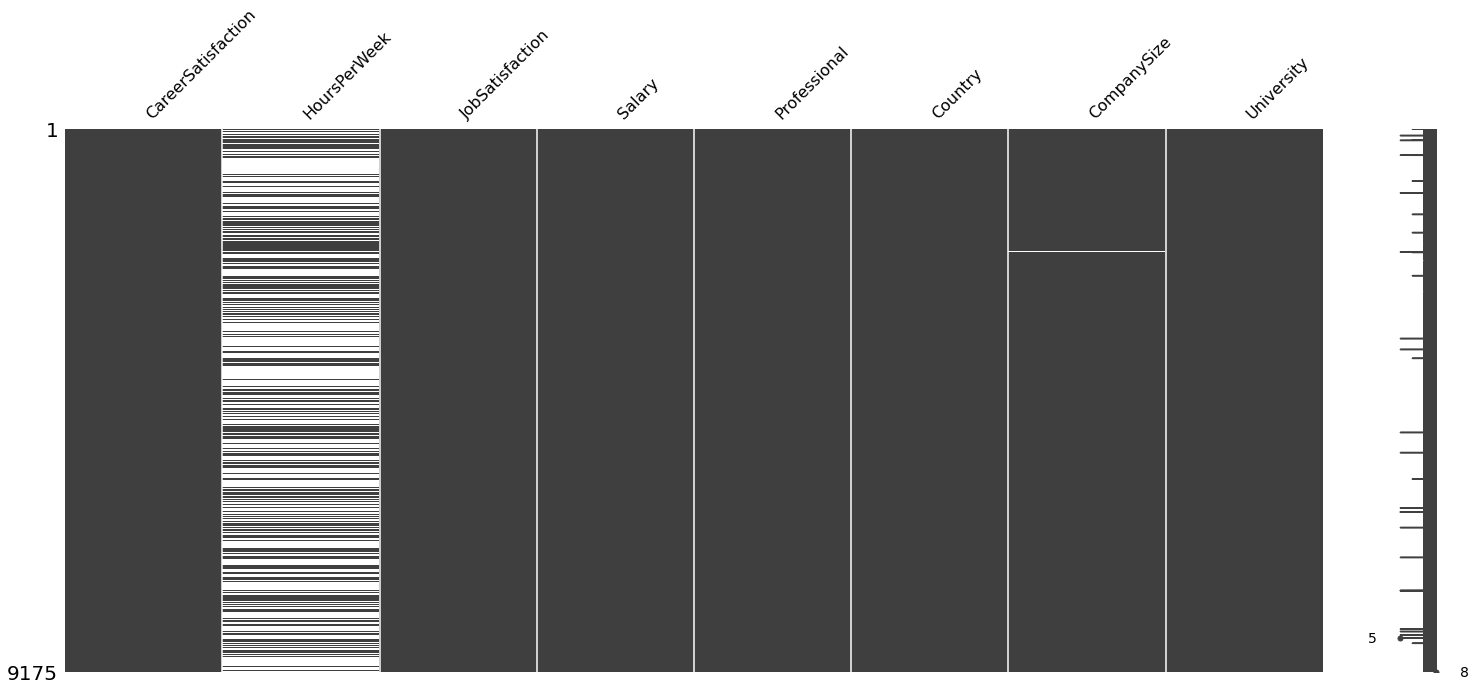

In [28]:
# check how the dataframe looks after dropping the salary missing data
msno.matrix(survey_top_clean)

We ended up loosing 70% of the datapoints because the lack of salary data but we are sure that the remaining data is original  and not manupluated by any means.


In [29]:
#get the percentage of null values relative to the size of the dataframe (survey_top)
(survey_top_clean.isnull().sum()/survey_top_clean.shape[0])*100

CareerSatisfaction     0.283379
HoursPerWeek          56.871935
JobSatisfaction        0.348774
Salary                 0.000000
Professional           0.000000
Country                0.000000
CompanySize            0.098093
University             0.000000
dtype: float64

It is not recommended to remove more data. It is better to drop the **HoursPerWeek** instead of dropping all of it again or at least replace it with the mean or mood.

Lets see the distribution of the HoursPerWeek.

array([[<AxesSubplot:title={'center':'CareerSatisfaction'}>,
        <AxesSubplot:title={'center':'HoursPerWeek'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

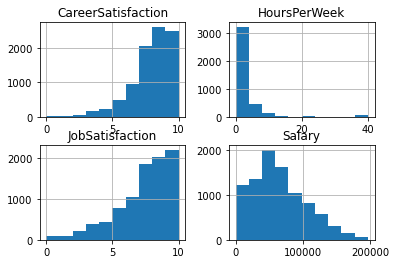

In [30]:
survey_top_clean.hist()

The HoursperWeek data is very skewed and shows less variation. 
It would add bios to try to interpret it. It will be removed from the analysis. 

In [31]:
survey_top_clean.drop(['HoursPerWeek'], axis =1, inplace = True)

C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [32]:
survey_top_clean.head()

,CareerSatisfaction,JobSatisfaction,Salary,Professional,Country,CompanySize,University
2,8.0,9.0,113750.0,Professional developer,United Kingdom,"10,000 or more employees",No
14,8.0,8.0,100000.0,Professional developer,United Kingdom,"5,000 to 9,999 employees",No
17,9.0,8.0,130000.0,Professional developer,United States,"1,000 to 4,999 employees","Yes, part-time"
18,5.0,3.0,82500.0,Professional developer,United States,"10,000 or more employees",No
25,7.0,7.0,175000.0,Professional developer,United States,"10,000 or more employees",No


In [33]:
survey_top_clean.dropna(inplace = True)

C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
survey_top_clean.isnull().sum()


CareerSatisfaction    0
JobSatisfaction       0
Salary                0
Professional          0
Country               0
CompanySize           0
University            0
dtype: int64

In [35]:
print(survey_top_clean.shape[0], 'is the number of rows in the clean dataframe')


9132 is the number of rows in the clean dataframe


# `6)` Dealing with categorical values 

We deal with missing values and categorical data before we go into modelling

In [36]:
#get dummies of the categorical data columns 

df_dummies = pd.get_dummies(data=survey_top_clean, columns=['Professional', 'Country','CompanySize','University'])
df_dummies.reset_index()

,index,CareerSatisfaction,JobSatisfaction,Salary,Professional_Professional developer,Country_Australia,Country_Canada,Country_France,Country_Germany,Country_India,...,CompanySize_20 to 99 employees,"CompanySize_5,000 to 9,999 employees",CompanySize_500 to 999 employees,CompanySize_Fewer than 10 employees,CompanySize_I don't know,CompanySize_I prefer not to answer,University_I prefer not to say,University_No,"University_Yes, full-time","University_Yes, part-time"
0,2,8.0,9.0,113750.000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,14,8.0,8.0,100000.000000,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,17,9.0,8.0,130000.000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,18,5.0,3.0,82500.000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,25,7.0,7.0,175000.000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9127,51355,6.0,5.0,33750.000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9128,51361,3.0,5.0,440.463955,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
9129,51382,9.0,5.0,32258.064516,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9130,51387,7.0,3.0,58000.000000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
#create survey_top_clean_dum considdering the dummies dataframe to keep names consistent

survey_top_clean_dum = df_dummies

# `7)` Modelling salary and evaluation

In [38]:
#get the column names of the clean dataset after converting the categorical columns into dummies
survey_top_clean_dum.columns

Index(['CareerSatisfaction', 'JobSatisfaction', 'Salary',
       'Professional_Professional developer', 'Country_Australia',
       'Country_Canada', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Poland', 'Country_Russian Federation', 'Country_Spain',
       'Country_United Kingdom', 'Country_United States',
       'CompanySize_1,000 to 4,999 employees',
       'CompanySize_10 to 19 employees',
       'CompanySize_10,000 or more employees',
       'CompanySize_100 to 499 employees', 'CompanySize_20 to 99 employees',
       'CompanySize_5,000 to 9,999 employees',
       'CompanySize_500 to 999 employees',
       'CompanySize_Fewer than 10 employees', 'CompanySize_I don't know',
       'CompanySize_I prefer not to answer', 'University_I prefer not to say',
       'University_No', 'University_Yes, full-time',
       'University_Yes, part-time'],
      dtype='object')

In [39]:
'''

apply linear regression modelling 

Our dataframe has been cleaned and categorical data has been managed through conversion into dummies.
Now it is the liear modelling process that will start with:
1- Define the features (x) and the response (y)
2- Split the dataset into training dataset and test dataset
3- Create teh linear regression object
4- Fit the model on the training data
5- Run the model on the test data 
6- Score the model

'''

#Split into explanatory and response variables

X = survey_top_clean_dum[['Professional_Professional developer', 'Country_Australia',
       'Country_Canada', 'Country_France', 'Country_Germany', 'Country_India',
       'Country_Poland', 'Country_Russian Federation', 'Country_Spain',
       'Country_United Kingdom', 'Country_United States',
       'CompanySize_1,000 to 4,999 employees',
       'CompanySize_10 to 19 employees',
       'CompanySize_10,000 or more employees',
       'CompanySize_100 to 499 employees', 'CompanySize_20 to 99 employees',
       'CompanySize_5,000 to 9,999 employees',
       'CompanySize_500 to 999 employees',
       'CompanySize_Fewer than 10 employees', "CompanySize_I don't know",
       'CompanySize_I prefer not to answer', 'University_I prefer not to say',
       'University_No', 'University_Yes, full-time',
       'University_Yes, part-time']]
y = survey_top_clean_dum['Salary']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))


'The r-squared score for the model 0.5702915360316755 on 2740 values.'

C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


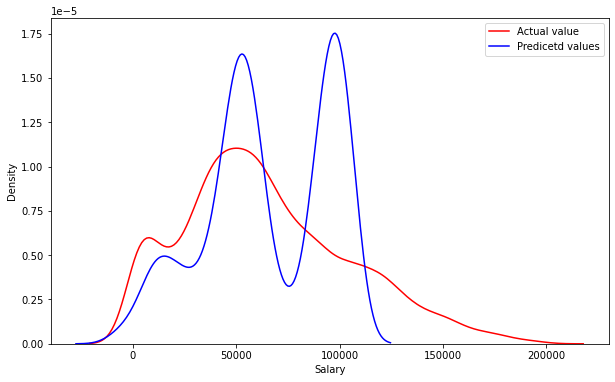

In [40]:
# see how the model behaved regarding the salay predected and the actual 
plt.figure(figsize=(10,6)) 
ax1 = sns.distplot(y_train , hist=False , color='r' , label = 'Actual value');
sns.distplot(y_test_preds, hist = False , color = 'b' , label = 'Predicetd values', ax = ax1);
plt.legend();

The linear model we ended up with looks not suitable to predict the salary correctly except at low salaries (below $50,000)

## Takeaways and summary 

`1-` The majority of respondents to the survey came from 10 countries; United States, India, United Kingdom, Germany, Canada, France, Poland, Australia, Russian Federation, and Spain. Programers in the United States earned the most while India and Russia earned the lowest.

`2-` The salary of a programmer is not related to education level as many earned more through a university degree. This could highlight the role of online education in building competent skillsets.

`3-` Our linear regression model that relied mainly on education, country and company size did not manage to predict salaried above $50,000 with good accuracy. More feature engineering work is required to enhance model performance.